# Applying Logistic Regression algorithm on amazon fine food Reviews dataset

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.

Number of reviews: 568,454
Number of users: 256,059
Number of products: 74,258
Timespan: Oct 1999 - Oct 2012
Number of Attributes/Columns in data: 10

Attribute Information:

Id
* ProductId - unique identifier for the product
* UserId - unqiue identifier for the user
* ProfileName
* HelpfulnessNumerator - number of users who found the review helpful
* HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
* Score - rating between 1 and 5
* Time - timestamp for the review
* Summary - brief summary of the review
* Text - text of the review

<b>Disclaimer :</b>
* I have trained all the brute force models with 40K Data points, But since I have only 4GB RAM I have trained kd_tree models with 3K points and tfidf W2V model with 10K points

# Data Preprocessing

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.preprocessing import Imputer
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import StandardScaler
con = sqlite3.connect('./amazon-fine-food-reviews/database.sqlite') 

filtered_data = pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3
""", con) 


def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition) 
filtered_data['Score'] = positiveNegative

/home/gateway/home/gateway/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
filtered_data.shape
filtered_data.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,positive,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,positive,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,positive,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,positive,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,positive,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [3]:
display= pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3 AND UserId="AR5J8UI46CURR"
ORDER BY ProductID
""", con)
display

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,78445,B000HDL1RQ,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
1,138317,B000HDOPYC,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
2,138277,B000HDOPYM,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
3,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
4,155049,B000PAQ75C,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...


In [4]:
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [5]:
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(364173, 10)

In [6]:
(final['Id'].size*1.0)/(filtered_data['Id'].size*1.0)*100

69.25890143662969

In [7]:
display= pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3 AND Id=44737 OR Id=64422
ORDER BY ProductID
""", con)
display


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...
1,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...


In [8]:
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]


In [9]:
print(final.shape)
final['Score'].value_counts()

(364171, 10)


positive    307061
negative     57110
Name: Score, dtype: int64

In [10]:
final=final.sort_values(by='Time')

In [11]:
labels=final["Score"]
final=final.drop("Score",axis=1)
final.head(4)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,939340800,EVERY book is educational,this witty little book makes my son laugh at l...
138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...
417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...
346055,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta..."


In [12]:
final=final[0:100000]
labels=labels[0:100000]

In [13]:
for i in range(0,labels.size):
    if labels.iloc[i]=='positive':
        labels.iloc[i]=1
    else:
        labels.iloc[i]=0

In [14]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english'))
sno = nltk.stem.SnowballStemmer('english') 
def cleanhtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [15]:
i=0
str1=' '
final_string=[]
s=''
for sent in final['Text'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent) 
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                else:
                    continue
            else:
                continue 
    str1 = b" ".join(filtered_sentence) 
    
    final_string.append(str1)
    i+=1

In [16]:
final['CleanedText']=final_string 
final['CleanedText']=final['CleanedText'].str.decode("utf-8")

In [17]:
final.loc[138706]['Text']

"this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college"

In [18]:
final.loc[138706]['CleanedText']

'witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg'

In [19]:
final.head(4)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,CleanedText
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...
417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...
346055,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...


In [20]:
tr_indx=int(70/100*final['CleanedText'].shape[0])
final['CleanedText']
X_tr=final.iloc[:tr_indx]['CleanedText']
y_tr=labels[:tr_indx]
X_test=final.iloc[tr_indx+1:]['CleanedText']
y_test=labels[tr_indx+1:]

In [21]:
print(X_tr.shape)
print(X_test.shape)

(70000,)
(29999,)


In [22]:
p=y_tr.astype('category')

In [23]:
print(p.describe())

count     70000
unique        2
top           1
freq      61832
Name: Score, dtype: int64


# Bag of words

 * ## Logistic Regression using Gridsearchcv 

In [24]:
count_vect = CountVectorizer()
final_counts = count_vect.fit_transform(X_tr)
final_test = count_vect.transform(X_test)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False,with_std=False)
final_counts = scaler.fit_transform( final_counts.astype('float') )
final_test = scaler.transform( final_test.astype('float') )


The optimal number of C is 1.


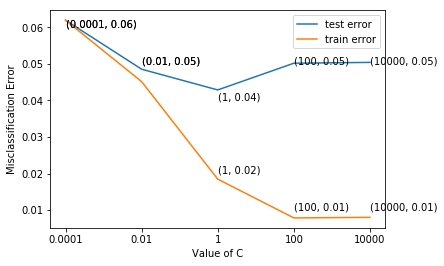

the misclassification error for each C value is :  [0.062 0.049 0.043 0.05  0.05 ]


In [26]:
C_val=[10**-4, 10**-2, 10**0, 10**2, 10**4]
tuned_parameters={'C': C_val}
lr = LogisticRegression(penalty='l2')
model = GridSearchCV(lr, tuned_parameters, scoring = 'f1', cv=3,return_train_score=True)
model.fit(final_counts, y_tr)
result=pd.DataFrame(model.cv_results_) 
MSE_test=[1-i for i in result['mean_test_score']]
MSE_train=[1-i for i in result['mean_train_score']]
optimal_c = C_val[MSE_test.index(min(MSE_test))]
print('\nThe optimal number of C is %d.' % optimal_c)
vals = [str(x) for x in C_val]
plt.plot(vals, MSE_test,label="test error")
plt.plot(vals, MSE_train,label="train error")
for xy in zip(vals, np.round(MSE_test,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
for xy in zip(vals, np.round(MSE_train,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.legend()
plt.xlabel('Value of C')
plt.ylabel('Misclassification Error')
plt.show()
print("the misclassification error for each C value is : ", np.round(MSE_test,3))

In [27]:
Lr2_optimal = LogisticRegression(C=optimal_c,penalty='l2')
Lr2_optimal.fit(final_counts, y_tr)
pred = Lr2_optimal.predict(final_test)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal Logistic Regression classifier for C = %d is %f%%' % (optimal_c, acc))


The accuracy of optimal Logistic Regression classifier for C = 1 is 91.966399%


#### Confusion matrix on test dataset

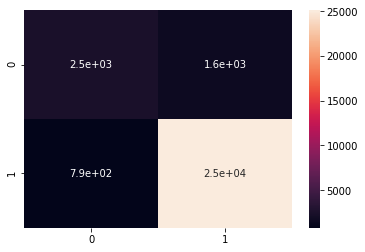

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

#### precision recall and f1-score values

In [29]:
from sklearn.metrics import precision_recall_fscore_support
scr=precision_recall_fscore_support(y_test, pred, average='weighted')
print("precision of the Logistic Regression for bag of words is",scr[0])
print("recall of the Logistic Regression for bag of words is",scr[1])
print("fscore of the Logistic Regression for bag of words is",scr[2])

precision of the Logistic Regression for bag of words is 0.9146902895060215
recall of the Logistic Regression for bag of words is 0.9196639887996266
fscore of the Logistic Regression for bag of words is 0.9158199685594473


#### confusion matrix on train dataset

In [30]:
Lr2_optimal = LogisticRegression(C=optimal_c,penalty='l2')
Lr2_optimal.fit(final_counts, y_tr)
pred = Lr2_optimal.predict(final_counts)
acc = accuracy_score(y_tr, pred) * 100
print('\nThe accuracy of optimal Logistic Regression classifier for C = %d is %f%%' % (optimal_c, acc))


The accuracy of optimal Logistic Regression classifier for C = 1 is 96.227143%


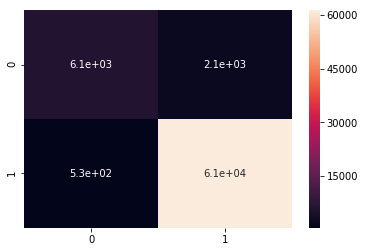

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_tr, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

### L1 regularizer 


The optimal number of C is 1.


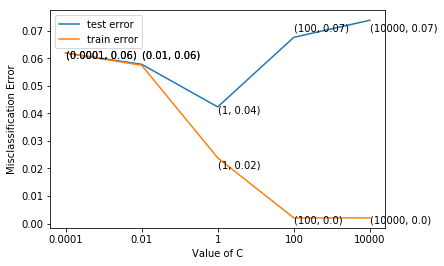

the misclassification error for each C value is :  [0.062 0.058 0.042 0.068 0.074]


In [32]:
C_val=[10**-4, 10**-2, 10**0, 10**2, 10**4]
tuned_parameters={'C': C_val}
lr = LogisticRegression(penalty='l1')
model = GridSearchCV(lr, tuned_parameters, scoring = 'f1', cv=3,return_train_score=True)
model.fit(final_counts, y_tr)
result=pd.DataFrame(model.cv_results_) 
MSE_test=[1-i for i in result['mean_test_score']]
MSE_train=[1-i for i in result['mean_train_score']]
optimal_c = C_val[MSE_test.index(min(MSE_test))]
print('\nThe optimal number of C is %d.' % optimal_c)
vals = [str(x) for x in C_val]
plt.plot(vals, MSE_test,label="test error")
plt.plot(vals, MSE_train,label="train error")
for xy in zip(vals, np.round(MSE_test,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
for xy in zip(vals, np.round(MSE_train,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.legend()
plt.xlabel('Value of C')
plt.ylabel('Misclassification Error')
plt.show()
print("the misclassification error for each C value is : ", np.round(MSE_test,3))

In [33]:
Lr1_optimal = LogisticRegression(C=optimal_c,penalty='l1')
Lr1_optimal.fit(final_counts, y_tr)
pred = Lr1_optimal.predict(final_test)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal Logistic Regression classifier for C = %d is %f%%' % (optimal_c, acc))


The accuracy of optimal Logistic Regression classifier for C = 1 is 91.963065%


#### Confusion matrix on test dataset

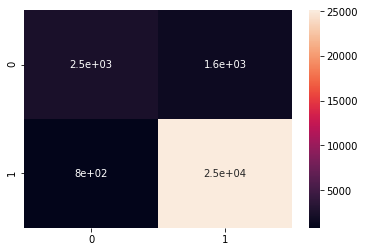

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

#### precision recall and f1-score values

In [35]:
from sklearn.metrics import precision_recall_fscore_support
scr=precision_recall_fscore_support(y_test, pred, average='weighted')
print("precision of the Logistic Regression for bag of words is",scr[0])
print("recall of the Logistic Regression for bag of words is",scr[1])
print("fscore of the Logistic Regression for bag of words is",scr[2])

precision of the Logistic Regression for bag of words is 0.9146776358163426
recall of the Logistic Regression for bag of words is 0.9196306543551451
fscore of the Logistic Regression for bag of words is 0.9158220711566469


#### confusion matrix on train dataset

In [36]:
Lr1_optimal = LogisticRegression(C=optimal_c,penalty='l1')
Lr1_optimal.fit(final_counts, y_tr)
pred = Lr1_optimal.predict(final_counts)
acc = accuracy_score(y_tr, pred) * 100
print('\nThe accuracy of optimal Logistic Regression classifier for C = %d is %f%%' % (optimal_c, acc))


The accuracy of optimal Logistic Regression classifier for C = 1 is 95.445714%


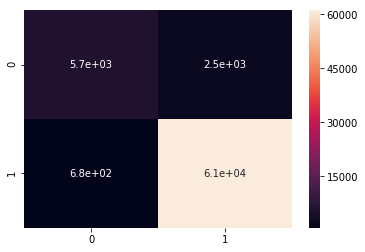

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_tr, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

####  sparsity check

In [38]:
print("Number of non zero elements obtained using L1 regularizer are:\n",np.count_nonzero(Lr1_optimal.coef_))
print("\nNumber of non zero elements obtained using L2 regularizer are:\n",np.count_nonzero(Lr2_optimal.coef_))

Number of non zero elements obtained using L1 regularizer are:
 3816

Number of non zero elements obtained using L2 regularizer are:
 31373


#### Important features

In [39]:
imp_fec = Lr2_optimal.coef_.argsort()
print("Top features to classify negative class labels are:\n")
print(np.take(count_vect.get_feature_names(), imp_fec[:,:11]),"\n")
print("Top features to classify positive class labels are:\n")
print(np.take(count_vect.get_feature_names(), imp_fec[:,-11:]),"\n")

Top features to classify negative class labels are:

[['worst' 'terribl' 'ugh' 'aw' 'threw' 'flavorless' 'fragment'
  'tasteless' 'unpleas' 'compass' 'unaccept']] 

Top features to classify positive class labels are:

[['scari' 'dum' 'nicer' 'uniqu' 'delici' 'perfect' 'amaz' 'ramun' 'solv'
  'accur' 'skeptic']] 



#### Multi collinearity check

In [45]:
from scipy import stats
from scipy.sparse import csc_matrix
original_weights = Lr2_optimal.coef_.ravel()
row,col=final_counts.nonzero()
data=np.zeros(final_counts.count_nonzero())+np.random.normal(0.00001, 0.0001)
noise_data=csc_matrix((data, (row, col)), shape=final_counts.shape)
Lr2_optimal.fit(noise_data,y_tr)
noise_weights = Lr2_optimal.coef_.ravel()
SpearmanrResult=stats.spearmanr(noise_weights,original_weights)
print("Spearman rank between the original weights and noise weights is:",SpearmanrResult[0])

Spearman rank between the original weights and noise weights is: 0.9999999997607141


 * ## Logistic Regression using Randomsearchcv


The optimal number of C is 1.


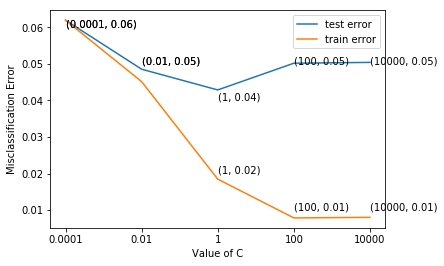

the misclassification error for each C value is :  [0.062 0.049 0.043 0.05  0.05 ]


In [46]:
from sklearn.model_selection import RandomizedSearchCV
C_val=[10**-4,10**-2, 10**0, 10**2 , 10**4]
tuned_parameters = {'C': C_val}
lr = LogisticRegression(penalty='l2')
model = RandomizedSearchCV(lr,tuned_parameters, scoring = 'f1',n_iter=5, cv=3,return_train_score=True)
model.fit(final_counts, y_tr)
result=pd.DataFrame(model.cv_results_) 
MSE_test=[1-i for i in result['mean_test_score']]
MSE_train=[1-i for i in result['mean_train_score']]
optimal_c = C_val[MSE_test.index(min(MSE_test))]
print('\nThe optimal number of C is %d.' % optimal_c)
vals = [str(x) for x in C_val]
plt.plot(vals, MSE_test,label="test error")
plt.plot(vals, MSE_train,label="train error")
for xy in zip(vals, np.round(MSE_test,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
for xy in zip(vals, np.round(MSE_train,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.legend()
plt.xlabel('Value of C')
plt.ylabel('Misclassification Error')
plt.show()
print("the misclassification error for each C value is : ", np.round(MSE_test,3))

In [52]:
Lr2_optimal = LogisticRegression(C=optimal_c,penalty='l2')
Lr2_optimal.fit(final_counts, y_tr)
pred = Lr2_optimal.predict(final_test)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal Logistic Regression classifier for C = %d is %f%%' % (optimal_c, acc))


The accuracy of optimal Logistic Regression classifier for C = 1 is 91.966399%


#### Confusion matrix for test dataset

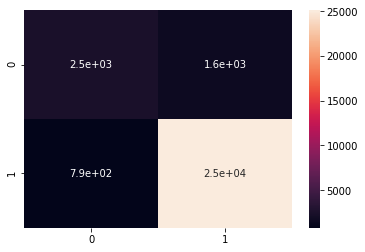

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

#### precision recall and f1-score values

In [54]:
from sklearn.metrics import precision_recall_fscore_support
scr=precision_recall_fscore_support(y_test, pred, average='weighted')
print("precision of the Logistic Regression for bag of words is",scr[0])
print("recall of the Logistic Regression for bag of words is",scr[1])
print("fscore of the Logistic Regression for bag of words is",scr[2])

precision of the Logistic Regression for bag of words is 0.9146902895060215
recall of the Logistic Regression for bag of words is 0.9196639887996266
fscore of the Logistic Regression for bag of words is 0.9158199685594473


#### confusion matrix for train dataset

In [55]:
Lr2_optimal = LogisticRegression(C=optimal_c,penalty='l2')
Lr2_optimal.fit(final_counts, y_tr)
pred = Lr2_optimal.predict(final_counts)
acc = accuracy_score(y_tr, pred) * 100
print('\nThe accuracy of optimal Logistic Regression classifier for C = %d is %f%%' % (optimal_c, acc))


The accuracy of optimal Logistic Regression classifier for C = 1 is 96.227143%


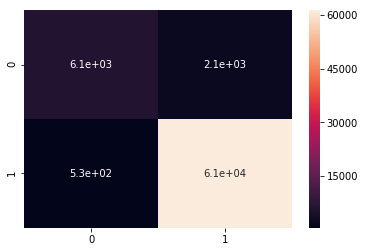

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_tr, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

# Tfidf

In [57]:
tf_idf_vect = TfidfVectorizer()
final_tf_idf = tf_idf_vect.fit_transform(X_tr)
final_test = tf_idf_vect.transform(X_test)

In [58]:
features = tf_idf_vect.get_feature_names()
len(features)

31373

In [59]:
features[3000:3010]

['bollilo',
 'bollion',
 'bollywood',
 'bologna',
 'bolognes',
 'bolsa',
 'bolsita',
 'bolster',
 'bolt',
 'bom']

In [60]:
print(final_tf_idf[3,:].toarray()[0])

[0. 0. 0. ... 0. 0. 0.]


In [61]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''

    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

top_tfidf = top_tfidf_feats(final_tf_idf[3,:].toarray()[0],features)
#print(np.argsort(final_tf_idf[3,:].toarray()[0])[::-1][:25])

final_tf_idf[3,:].get_shape()

[23572 23565   101 16792 11081  4131  6922 14780  3709 17251  8311 27860
  9955 19791 28619 21542 17712 21014 26005 30707 10421 10422 10458 10457
 10456]


(1, 31373)

In [62]:
top_tfidf

,feature,tfidf
0,rumplestiskin,0.323369
1,rumbl,0.280940
2,absurd,0.255726
3,masterpiec,0.252120
4,geena,0.246051
5,captur,0.242628
6,davi,0.236172
7,keaton,0.231460
8,burton,0.230922
9,michael,0.228379


In [63]:
scaler = StandardScaler(with_mean=False,with_std=False)
final_tf_idf = scaler.fit_transform( final_tf_idf.astype('float') )
final_test = scaler.transform( final_test.astype('float') )


The optimal number of C is 1.


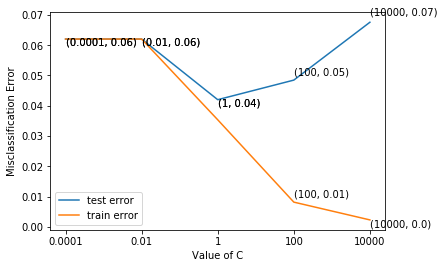

the misclassification error for each C value is :  [0.062 0.062 0.042 0.048 0.068]


In [64]:
C_val=[10**-4, 10**-2, 10**0, 10**2, 10**4]
tuned_parameters={'C': C_val}
lr = LogisticRegression(penalty='l2')
model = GridSearchCV(lr, tuned_parameters, scoring = 'f1', cv=3,return_train_score=True)
model.fit(final_tf_idf, y_tr)
result=pd.DataFrame(model.cv_results_) 
MSE_test=[1-i for i in result['mean_test_score']]
MSE_train=[1-i for i in result['mean_train_score']]
optimal_c = C_val[MSE_test.index(min(MSE_test))]
print('\nThe optimal number of C is %d.' % optimal_c)
vals = [str(x) for x in C_val]
plt.plot(vals, MSE_test,label="test error")
plt.plot(vals, MSE_train,label="train error")
for xy in zip(vals, np.round(MSE_test,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
for xy in zip(vals, np.round(MSE_train,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.legend()
plt.xlabel('Value of C')
plt.ylabel('Misclassification Error')
plt.show()
print("the misclassification error for each C value is : ", np.round(MSE_test,3))

In [65]:
Lr2_optimal = LogisticRegression(C=optimal_c,penalty='l2')
Lr2_optimal.fit(final_tf_idf, y_tr)
pred = Lr2_optimal.predict(final_test)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal Logistic Regression classifier for C = %d is %f%%' % (optimal_c, acc))


The accuracy of optimal Logistic Regression classifier for C = 1 is 91.876396%


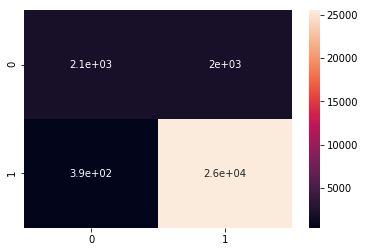

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

#### precision recall and f1-score values

In [67]:
from sklearn.metrics import precision_recall_fscore_support
scr=precision_recall_fscore_support(y_test, pred, average='weighted')
print("precision of the Logistic Regression for bag of words is",scr[0])
print("recall of the Logistic Regression for bag of words is",scr[1])
print("fscore of the Logistic Regression for bag of words is",scr[2])

precision of the Logistic Regression for bag of words is 0.9140267039634165
recall of the Logistic Regression for bag of words is 0.9187639587986266
fscore of the Logistic Regression for bag of words is 0.9097883480072233


#### confusion matrix on train dataset

In [68]:
Lr2_optimal = LogisticRegression(C=optimal_c,penalty='l2')
Lr2_optimal.fit(final_tf_idf, y_tr)
pred = Lr2_optimal.predict(final_tf_idf)
acc = accuracy_score(y_tr, pred) * 100
print('\nThe accuracy of optimal Logistic Regression classifier for C = %d is %f%%' % (optimal_c, acc))


The accuracy of optimal Logistic Regression classifier for C = 1 is 93.750000%


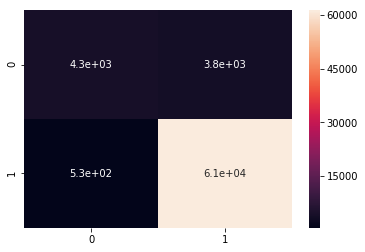

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_tr, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

### L1 Regularizer


The optimal number of C is 1.


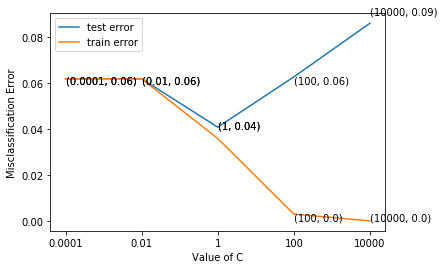

the misclassification error for each C value is :  [0.062 0.062 0.041 0.063 0.086]


In [70]:
C_val=[10**-4, 10**-2, 10**0, 10**2, 10**4]
tuned_parameters={'C': C_val}
lr = LogisticRegression(penalty='l1')
model = GridSearchCV(lr, tuned_parameters, scoring = 'f1', cv=3,return_train_score=True)
model.fit(final_tf_idf, y_tr)
result=pd.DataFrame(model.cv_results_) 
MSE_test=[1-i for i in result['mean_test_score']]
MSE_train=[1-i for i in result['mean_train_score']]
optimal_c = C_val[MSE_test.index(min(MSE_test))]
print('\nThe optimal number of C is %d.' % optimal_c)
vals = [str(x) for x in C_val]
plt.plot(vals, MSE_test,label="test error")
plt.plot(vals, MSE_train,label="train error")
for xy in zip(vals, np.round(MSE_test,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
for xy in zip(vals, np.round(MSE_train,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.legend()
plt.xlabel('Value of C')
plt.ylabel('Misclassification Error')
plt.show()
print("the misclassification error for each C value is : ", np.round(MSE_test,3))

In [71]:
Lr1_optimal = LogisticRegression(C=optimal_c,penalty='l1')
Lr1_optimal.fit(final_tf_idf, y_tr)
pred = Lr1_optimal.predict(final_test)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal Logistic Regression classifier for C = %d is %f%%' % (optimal_c, acc))


The accuracy of optimal Logistic Regression classifier for C = 1 is 92.199740%


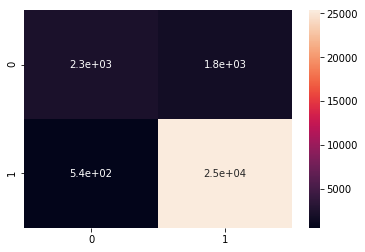

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

#### precision recall and f1-score values

In [73]:
from sklearn.metrics import precision_recall_fscore_support
scr=precision_recall_fscore_support(y_test, pred, average='weighted')
print("precision of the Logistic Regression for bag of words is",scr[0])
print("recall of the Logistic Regression for bag of words is",scr[1])
print("fscore of the Logistic Regression for bag of words is",scr[2])

precision of the Logistic Regression for bag of words is 0.9167949847188056
recall of the Logistic Regression for bag of words is 0.9219973999133304
fscore of the Logistic Regression for bag of words is 0.915896145033496


#### confusion matrix on train dataset

In [74]:
Lr1_optimal = LogisticRegression(C=optimal_c,penalty='l1')
Lr1_optimal.fit(final_counts, y_tr)
pred = Lr1_optimal.predict(final_counts)
acc = accuracy_score(y_tr, pred) * 100
print('\nThe accuracy of optimal Logistic Regression classifier for C = %d is %f%%' % (optimal_c, acc))


The accuracy of optimal Logistic Regression classifier for C = 1 is 95.438571%


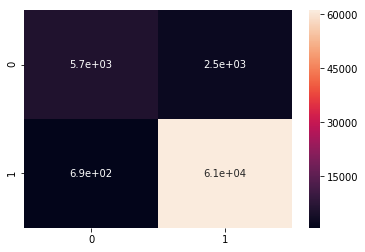

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_tr, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

#### sparsity check

In [76]:
print("Number of non zero elements obtained using L1 regularizer are:\n",np.count_nonzero(Lr1_optimal.coef_))
print("\nNumber of non zero elements obtained using L2 regularizer are:\n",np.count_nonzero(Lr2_optimal.coef_))

Number of non zero elements obtained using L1 regularizer are:
 3810

Number of non zero elements obtained using L2 regularizer are:
 31373


#### Important features

In [77]:
imp_fec = Lr2_optimal.coef_.argsort()
print("Top features to classify negative class labels are:\n")
print(np.take(tf_idf_vect.get_feature_names(), imp_fec[:,:11]),"\n")
print("Top features to classify positive class labels are:\n")
print(np.take(tf_idf_vect.get_feature_names(), imp_fec[:,-11:]),"\n")

Top features to classify negative class labels are:

[['worst' 'disappoint' 'terribl' 'aw' 'bland' 'horribl' 'unfortun'
  'return' 'threw' 'stale' 'tasteless']] 

Top features to classify positive class labels are:

[['amaz' 'wonder' 'favorit' 'good' 'nice' 'excel' 'perfect' 'delici'
  'love' 'best' 'great']] 



#### multicollinearity check

In [79]:
from scipy import stats
from scipy.sparse import csc_matrix
original_weights = Lr2_optimal.coef_.ravel()
#noise_data=final_counts.todense()+np.random.normal(0, 0.01)
row,col=final_tf_idf.nonzero()
data=np.zeros(final_tf_idf.count_nonzero())+np.random.normal(0.001, 0.01)
noise_data=csc_matrix((data, (row, col)), shape=final_tf_idf.shape)
Lr2_optimal.fit(noise_data,y_tr)
noise_weights = Lr2_optimal.coef_.ravel()
SpearmanrResult=stats.spearmanr(noise_weights,original_weights)
print("Spearman rank between the original weights and noise weights is:",SpearmanrResult[0])

Spearman rank between the original weights and noise weights is: 0.9998269361218893


# RandonSearchCV


The optimal number of C is 1.


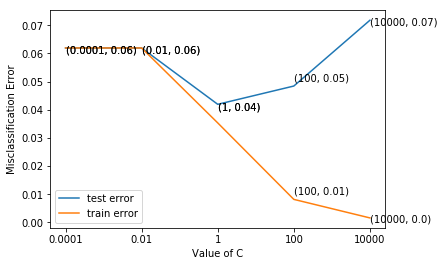

the misclassification error for each C value is :  [0.062 0.062 0.042 0.048 0.072]


In [80]:
from sklearn.model_selection import RandomizedSearchCV
C_val=[10**-4,10**-2, 10**0, 10**2 , 10**4]
tuned_parameters = {'C': C_val}
lr = LogisticRegression(penalty='l2')
model = RandomizedSearchCV(lr,tuned_parameters, scoring = 'f1',n_iter=5, cv=3,return_train_score=True)
model.fit(final_tf_idf, y_tr)
result=pd.DataFrame(model.cv_results_) 
MSE_test=[1-i for i in result['mean_test_score']]
MSE_train=[1-i for i in result['mean_train_score']]
optimal_c = C_val[MSE_test.index(min(MSE_test))]
print('\nThe optimal number of C is %d.' % optimal_c)
vals = [str(x) for x in C_val]
plt.plot(vals, MSE_test,label="test error")
plt.plot(vals, MSE_train,label="train error")
for xy in zip(vals, np.round(MSE_test,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
for xy in zip(vals, np.round(MSE_train,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.legend()
plt.xlabel('Value of C')
plt.ylabel('Misclassification Error')
plt.show()
print("the misclassification error for each C value is : ", np.round(MSE_test,3))

In [81]:
Lr2_optimal = LogisticRegression(C=optimal_c,penalty='l2')
Lr2_optimal.fit(final_tf_idf, y_tr)
pred = Lr2_optimal.predict(final_test)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal Logistic Regression classifier for C = %d is %f%%' % (optimal_c, acc))


The accuracy of optimal Logistic Regression classifier for C = 1 is 91.876396%


#### Confusion matrix for test dataset

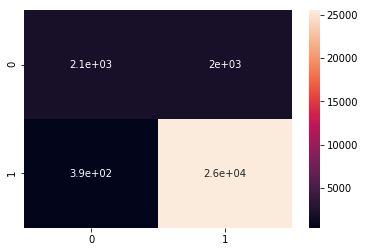

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

#### precision recall and f1-score values

In [83]:
from sklearn.metrics import precision_recall_fscore_support
scr=precision_recall_fscore_support(y_test, pred, average='weighted')
print("precision of the Logistic Regression for bag of words is",scr[0])
print("recall of the Logistic Regression for bag of words is",scr[1])
print("fscore of the Logistic Regression for bag of words is",scr[2])

precision of the Logistic Regression for bag of words is 0.9140267039634165
recall of the Logistic Regression for bag of words is 0.9187639587986266
fscore of the Logistic Regression for bag of words is 0.9097883480072233


#### Confusion matrix for train dataset

In [84]:
Lr2_optimal = LogisticRegression(C=optimal_c,penalty='l2')
Lr2_optimal.fit(final_tf_idf, y_tr)
pred = Lr2_optimal.predict(final_tf_idf)
acc = accuracy_score(y_tr, pred) * 100
print('\nThe accuracy of optimal Logistic Regression classifier for C = %d is %f%%' % (optimal_c, acc))


The accuracy of optimal Logistic Regression classifier for C = 1 is 93.752857%


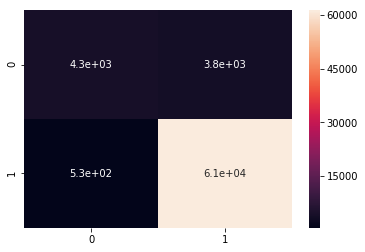

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_tr, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

# Word to Vec

In [86]:
list_of_sent=[]
for sent in X_tr:
    list_of_sent.append(sent.split())

In [87]:
list_of_test=[]
for sent in X_test:
    list_of_test.append(sent.split())

In [90]:
print(X_tr.iloc[0])
print("*****************************************************************")
print(list_of_sent[0])

witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg
*****************************************************************
['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'book', 'introduc', 'silli', 'classic', 'book', 'will', 'bet', 'son', 'still', 'abl', 'recit', 'memori', 'colleg']


In [91]:
print(X_test.iloc[0])
print("*****************************************************************")
print(list_of_test[0])

great price wonder creami resin flavor toast skillet microwav add salad cooki anyth freez well keep frige hand eat one highest nut protein
*****************************************************************
['great', 'price', 'wonder', 'creami', 'resin', 'flavor', 'toast', 'skillet', 'microwav', 'add', 'salad', 'cooki', 'anyth', 'freez', 'well', 'keep', 'frige', 'hand', 'eat', 'one', 'highest', 'nut', 'protein']


In [92]:
import gensim
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)

In [93]:
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  10700
sample words  ['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'introduc', 'silli', 'classic', 'will', 'bet', 'still', 'abl', 'memori', 'colleg', 'rememb', 'see', 'show', 'air', 'televis', 'year', 'ago', 'child', 'sister', 'later', 'bought', 'day', 'thirti', 'someth', 'use', 'seri', 'song', 'student', 'teach', 'preschool']


In [94]:
w2v_model.wv.most_similar('book')

/home/gateway/home/gateway/anaconda/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('blog', 0.8257500529289246),
 ('articl', 0.8075904250144958),
 ('page', 0.7744689583778381),
 ('author', 0.7693332433700562),
 ('magazin', 0.7661412358283997),
 ('group', 0.7538758516311646),
 ('inform', 0.7510205507278442),
 ('publish', 0.7335245609283447),
 ('data', 0.7296908497810364),
 ('info', 0.7278462648391724)]

In [98]:
w2v_model.wv.most_similar('great')

/home/gateway/home/gateway/anaconda/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('excel', 0.8182569146156311),
 ('terrif', 0.814024806022644),
 ('good', 0.813900351524353),
 ('fantast', 0.8112138509750366),
 ('wonder', 0.7849206924438477),
 ('perfect', 0.754715621471405),
 ('awesom', 0.7522028684616089),
 ('nice', 0.7235707640647888),
 ('yummi', 0.6346531510353088),
 ('fabul', 0.6269022226333618)]

# Avg word2Vec

In [99]:
sent_vectors = [];
for sent in list_of_sent: 
    sent_vec = np.zeros(50)
    cnt_words =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)

In [100]:
test_vectors = [];
for sent in list_of_test: 
    sent_vec = np.zeros(50)
    cnt_words =0;
    for word in sent:
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    test_vectors.append(sent_vec)

In [101]:
df = pd.DataFrame(sent_vectors)
sent_vectors=df.fillna(0)
df = pd.DataFrame(test_vectors)
test_vectors=df.fillna(0)

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sent_vectors = scaler.fit_transform(sent_vectors)
test_vectors = scaler.transform(test_vectors)


The optimal number of C is 100.


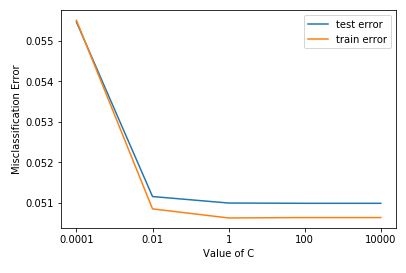

the misclassification error for each C value is :  [0.055 0.051 0.051 0.051 0.051]


In [105]:
C_val=[10**-4, 10**-2, 10**0, 10**2, 10**4]
tuned_parameters={'C': C_val}
lr = LogisticRegression(penalty='l2')
model = GridSearchCV(lr, tuned_parameters, scoring = 'f1', cv=3,return_train_score=True)
model.fit(sent_vectors, y_tr)
result=pd.DataFrame(model.cv_results_) 
MSE_test=[1-i for i in result['mean_test_score']]
MSE_train=[1-i for i in result['mean_train_score']]
optimal_c = C_val[MSE_test.index(min(MSE_test))]
print('\nThe optimal number of C is %d.' % optimal_c)
vals = [str(x) for x in C_val]
plt.plot(vals, MSE_test,label="test error")
plt.plot(vals, MSE_train,label="train error")
for xy in zip(vals, np.round(MSE_test,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
for xy in zip(vals, np.round(MSE_train,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.legend()
plt.xlabel('Value of C')
plt.ylabel('Misclassification Error')
plt.show()
print("the misclassification error for each C value is : ", np.round(MSE_test,3))

In [106]:
Lr2_optimal = LogisticRegression(C=optimal_c,penalty='l2')
Lr2_optimal.fit(sent_vectors, y_tr)
pred = Lr2_optimal.predict(test_vectors)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal Logistic Regression classifier for C = %d is %f%%' % (optimal_c, acc))


The accuracy of optimal Logistic Regression classifier for C = 100 is 89.496317%


#### confusion matrix on test dataset

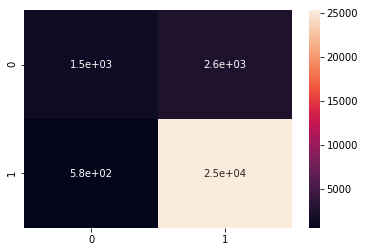

In [107]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

#### precision recall and f1-score values

In [108]:
from sklearn.metrics import precision_recall_fscore_support
scr=precision_recall_fscore_support(y_test, pred, average='weighted')
print("precision of the Logistic Regression for bag of words is",scr[0])
print("recall of the Logistic Regression for bag of words is",scr[1])
print("fscore of the Logistic Regression for bag of words is",scr[2])

precision of the Logistic Regression for bag of words is 0.8828403369864743
recall of the Logistic Regression for bag of words is 0.8949631654388479
fscore of the Logistic Regression for bag of words is 0.8801644877516911


#### confusion matrix on train dataset

In [110]:
Lr2_optimal = LogisticRegression(C=optimal_c,penalty='l2')
Lr2_optimal.fit(sent_vectors, y_tr)
pred = Lr2_optimal.predict(sent_vectors)
acc = accuracy_score(y_tr, pred) * 100
print('\nThe accuracy of optimal Logistic Regression classifier for C = %d is %f%%' % (optimal_c, acc))


The accuracy of optimal Logistic Regression classifier for C = 100 is 90.747143%


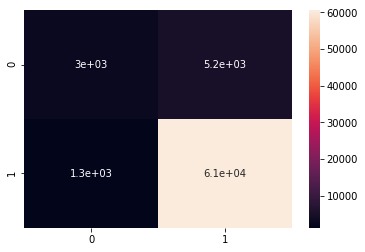

In [111]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_tr, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)


The optimal number of C is 100.


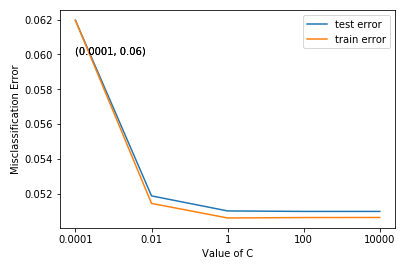

the misclassification error for each C value is :  [0.062 0.052 0.051 0.051 0.051]


In [112]:
C_val=[10**-4, 10**-2, 10**0, 10**2, 10**4]
tuned_parameters={'C': C_val}
lr = LogisticRegression(penalty='l1')
model = GridSearchCV(lr, tuned_parameters, scoring = 'f1', cv=3,return_train_score=True)
model.fit(sent_vectors, y_tr)
result=pd.DataFrame(model.cv_results_) 
MSE_test=[1-i for i in result['mean_test_score']]
MSE_train=[1-i for i in result['mean_train_score']]
optimal_c = C_val[MSE_test.index(min(MSE_test))]
print('\nThe optimal number of C is %d.' % optimal_c)
vals = [str(x) for x in C_val]
plt.plot(vals, MSE_test,label="test error")
plt.plot(vals, MSE_train,label="train error")
for xy in zip(vals, np.round(MSE_test,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
for xy in zip(vals, np.round(MSE_train,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.legend()
plt.xlabel('Value of C')
plt.ylabel('Misclassification Error')
plt.show()
print("the misclassification error for each C value is : ", np.round(MSE_test,3))

In [113]:
Lr1_optimal = LogisticRegression(C=optimal_c,penalty='l1')
Lr1_optimal.fit(sent_vectors, y_tr)
pred = Lr1_optimal.predict(test_vectors)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal Logistic Regression classifier for C = %d is %f%%' % (optimal_c, acc))


The accuracy of optimal Logistic Regression classifier for C = 100 is 89.496317%


#### confusion matrix on test dataset

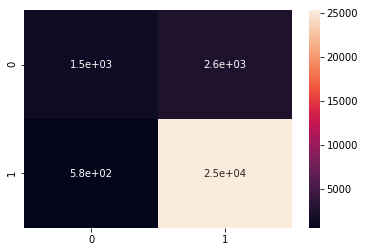

In [114]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

#### precision recall and f1-score values

In [115]:
from sklearn.metrics import precision_recall_fscore_support
scr=precision_recall_fscore_support(y_test, pred, average='weighted')
print("precision of the Logistic Regression for bag of words is",scr[0])
print("recall of the Logistic Regression for bag of words is",scr[1])
print("fscore of the Logistic Regression for bag of words is",scr[2])

precision of the Logistic Regression for bag of words is 0.8828403369864743
recall of the Logistic Regression for bag of words is 0.8949631654388479
fscore of the Logistic Regression for bag of words is 0.8801644877516911


#### confusion matrix on train dataset

In [116]:
Lr2_optimal = LogisticRegression(C=optimal_c,penalty='l2')
Lr2_optimal.fit(final_tf_idf, y_tr)
pred = Lr2_optimal.predict(final_tf_idf)
acc = accuracy_score(y_tr, pred) * 100
print('\nThe accuracy of optimal Logistic Regression classifier for C = %d is %f%%' % (optimal_c, acc))


The accuracy of optimal Logistic Regression classifier for C = 100 is 97.885714%


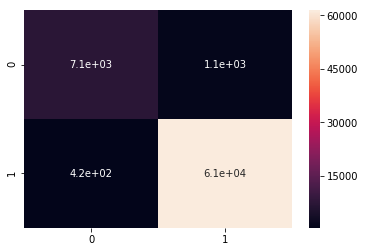

In [118]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_tr, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

#### sparsity check

In [120]:
print("Total number of non_zero features in optimal l1 norm are",np.count_nonzero(Lr1_optimal.coef_))
print("Total number of non_zero features in optimal l2 norm are",np.count_nonzero(Lr2_optimal.coef_))

Total number of non_zero features in optimal l1 norm are 50
Total number of non_zero features in optimal l2 norm are 31373


#### multicollinearity check

In [122]:
from scipy import stats
original_weights = Lr2_optimal.coef_.ravel()
noise_data=sent_vectors+np.random.normal(0.001, 0.01)
Lr2_optimal.fit(noise_data,y_tr)
noise_weights = Lr2_optimal.coef_.ravel()
SpearmanrResult=stats.spearmanr(noise_weights,original_weights)
print("Spearman rank between the original weights and noise weights is:",SpearmanrResult[0])

Spearman rank between the original weights and noise weights is: 0.9999999999999999


# RandonSearchCV


The optimal number of C is 100.


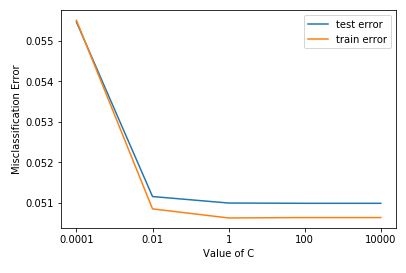

the misclassification error for each C value is :  [0.055 0.051 0.051 0.051 0.051]


In [123]:
from sklearn.model_selection import RandomizedSearchCV
C_val=[10**-4,10**-2, 10**0, 10**2 , 10**4]
tuned_parameters = {'C': C_val}
lr = LogisticRegression(penalty='l2')
model = RandomizedSearchCV(lr,tuned_parameters, scoring = 'f1',n_iter=5, cv=3,return_train_score=True)
model.fit(sent_vectors, y_tr)
result=pd.DataFrame(model.cv_results_) 
MSE_test=[1-i for i in result['mean_test_score']]
MSE_train=[1-i for i in result['mean_train_score']]
optimal_c = C_val[MSE_test.index(min(MSE_test))]
print('\nThe optimal number of C is %d.' % optimal_c)
vals = [str(x) for x in C_val]
plt.plot(vals, MSE_test,label="test error")
plt.plot(vals, MSE_train,label="train error")
for xy in zip(vals, np.round(MSE_test,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
for xy in zip(vals, np.round(MSE_train,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.legend()
plt.xlabel('Value of C')
plt.ylabel('Misclassification Error')
plt.show()
print("the misclassification error for each C value is : ", np.round(MSE_test,3))

In [124]:
Lr2_optimal = LogisticRegression(C=optimal_c,penalty='l2')
Lr2_optimal.fit(sent_vectors, y_tr)
pred = Lr2_optimal.predict(test_vectors)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal Logistic Regression classifier for C = %d is %f%%' % (optimal_c, acc))


The accuracy of optimal Logistic Regression classifier for C = 100 is 89.496317%


#### confusion matrix on test dataset

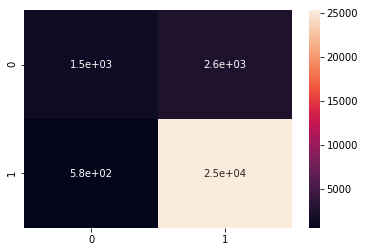

In [125]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

#### precision recall and f1-score values

In [126]:
from sklearn.metrics import precision_recall_fscore_support
scr=precision_recall_fscore_support(y_test, pred, average='weighted')
print("precision of the Logistic Regression for bag of words is",scr[0])
print("recall of the Logistic Regression for bag of words is",scr[1])
print("fscore of the Logistic Regression for bag of words is",scr[2])

precision of the Logistic Regression for bag of words is 0.8828403369864743
recall of the Logistic Regression for bag of words is 0.8949631654388479
fscore of the Logistic Regression for bag of words is 0.8801644877516911


#### confusion matrix on train dataset

In [127]:
Lr2_optimal = LogisticRegression(C=optimal_c,penalty='l2')
Lr2_optimal.fit(sent_vectors, y_tr)
pred = Lr2_optimal.predict(sent_vectors)
acc = accuracy_score(y_tr, pred) * 100
print('\nThe accuracy of optimal Logistic Regression classifier for C = %d is %f%%' % (optimal_c, acc))


The accuracy of optimal Logistic Regression classifier for C = 100 is 90.747143%


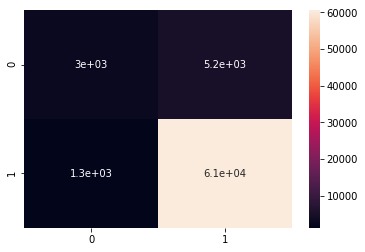

In [128]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_tr, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

# Tfidf W2V

In [129]:
tfidf_feat = tf_idf_vect.get_feature_names() 
tfidf_sent_vectors = [];
row=0;
i=1
for sent in list_of_sent:
    sent_vec = np.zeros(50) 
    weight_sum =0; 
    for word in sent:
        try:
            vec = w2v_model.wv[word]
            tf_idf = final_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

In [130]:
tfidf_feat = tf_idf_vect.get_feature_names()
tfidf_test_vectors = []; 
row=0;
for sent in list_of_test:
    sent_vec = np.zeros(50)
    weight_sum =0; 
    for word in sent: 
        try:
            vec = w2v_model.wv[word]
            tf_idf = final_test[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_test_vectors.append(sent_vec)
    row += 1

In [131]:
df = pd.DataFrame(tfidf_sent_vectors)
tfidf_sent_vectors=df.fillna(0)
df = pd.DataFrame(tfidf_test_vectors)
tfidf_test_vectors=df.fillna(0)

In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
tfidf_sent_vectors = scaler.fit_transform( tfidf_sent_vectors )
tfidf_test_vectors = scaler.transform( tfidf_test_vectors )


The optimal number of C is 1.


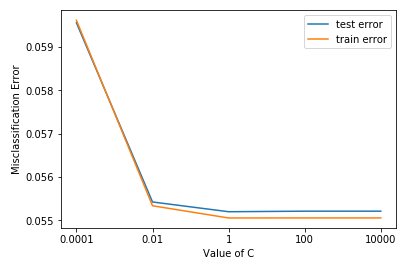

the misclassification error for each C value is :  [0.06  0.055 0.055 0.055 0.055]


In [133]:
C_val=[10**-4, 10**-2, 10**0, 10**2, 10**4]
tuned_parameters={'C': C_val}
lr = LogisticRegression(penalty='l2')
model = GridSearchCV(lr, tuned_parameters, scoring = 'f1', cv=3,return_train_score=True)
model.fit(tfidf_sent_vectors, y_tr)
result=pd.DataFrame(model.cv_results_) 
MSE_test=[1-i for i in result['mean_test_score']]
MSE_train=[1-i for i in result['mean_train_score']]
optimal_c = C_val[MSE_test.index(min(MSE_test))]
print('\nThe optimal number of C is %d.' % optimal_c)
vals = [str(x) for x in C_val]
plt.plot(vals, MSE_test,label="test error")
plt.plot(vals, MSE_train,label="train error")
for xy in zip(vals, np.round(MSE_test,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
for xy in zip(vals, np.round(MSE_train,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.legend()
plt.xlabel('Value of C')
plt.ylabel('Misclassification Error')
plt.show()
print("the misclassification error for each C value is : ", np.round(MSE_test,3))

In [134]:
Lr2_optimal = LogisticRegression(C=optimal_c,penalty='l2')
Lr2_optimal.fit(tfidf_sent_vectors, y_tr)
pred = Lr1_optimal.predict(tfidf_test_vectors)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal Logistic Regression classifier for C = %d is %f%%' % (optimal_c, acc))


The accuracy of optimal Logistic Regression classifier for C = 1 is 87.876263%


#### confusion matrix on test dataset

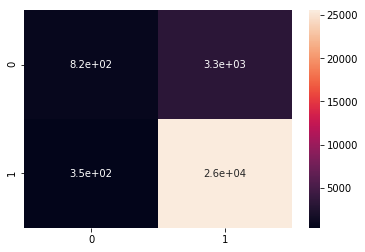

In [135]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

In [136]:
from sklearn.metrics import precision_recall_fscore_support
scr=precision_recall_fscore_support(y_test, pred, average='weighted')
print("precision of the Logistic Regression for bag of words is",scr[0])
print("recall of the Logistic Regression for bag of words is",scr[1])
print("fscore of the Logistic Regression for bag of words is",scr[2])

precision of the Logistic Regression for bag of words is 0.8605122695161046
recall of the Logistic Regression for bag of words is 0.8787626254208474
fscore of the Logistic Regression for bag of words is 0.8482598777128867


#### confusion matrix on train dataset

In [138]:
Lr2_optimal = LogisticRegression(C=optimal_c,penalty='l2')
Lr2_optimal.fit(tfidf_sent_vectors, y_tr)
pred = Lr1_optimal.predict(tfidf_sent_vectors)
acc = accuracy_score(y_tr, pred) * 100
print('\nThe accuracy of optimal Logistic Regression classifier for C = %d is %f%%' % (optimal_c, acc))


The accuracy of optimal Logistic Regression classifier for C = 1 is 89.554286%


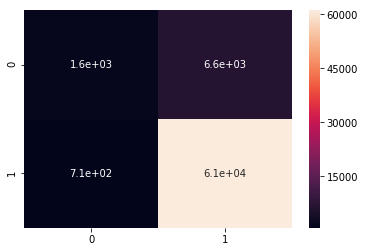

In [139]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_tr, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

## L1 Regularization


The optimal number of C is 1.


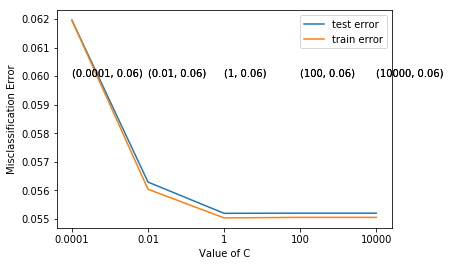

the misclassification error for each C value is :  [0.062 0.056 0.055 0.055 0.055]


In [140]:
C_val=[10**-4, 10**-2, 10**0, 10**2, 10**4]
tuned_parameters={'C': C_val}
lr = LogisticRegression(penalty='l1')
model = GridSearchCV(lr, tuned_parameters, scoring = 'f1', cv=3,return_train_score=True)
model.fit(tfidf_sent_vectors, y_tr)
result=pd.DataFrame(model.cv_results_) 
MSE_test=[1-i for i in result['mean_test_score']]
MSE_train=[1-i for i in result['mean_train_score']]
optimal_c = C_val[MSE_test.index(min(MSE_test))]
print('\nThe optimal number of C is %d.' % optimal_c)
vals = [str(x) for x in C_val]
plt.plot(vals, MSE_test,label="test error")
plt.plot(vals, MSE_train,label="train error")
for xy in zip(vals, np.round(MSE_test,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
for xy in zip(vals, np.round(MSE_train,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.legend()
plt.xlabel('Value of C')
plt.ylabel('Misclassification Error')
plt.show()
print("the misclassification error for each C value is : ", np.round(MSE_test,3))

#### confusion matrix on test dataset

In [141]:
Lr1_optimal = LogisticRegression(C=optimal_c,penalty='l1')
Lr1_optimal.fit(tfidf_sent_vectors, y_tr)
pred = Lr1_optimal.predict(tfidf_test_vectors)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal Logistic Regression classifier for C = %d is %f%%' % (optimal_c, acc))


The accuracy of optimal Logistic Regression classifier for C = 1 is 88.479616%


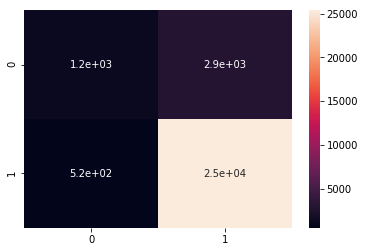

In [142]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

#### precision recall and f1-score values

In [143]:
from sklearn.metrics import precision_recall_fscore_support
scr=precision_recall_fscore_support(y_test, pred, average='weighted')
print("precision of the Logistic Regression for bag of words is",scr[0])
print("recall of the Logistic Regression for bag of words is",scr[1])
print("fscore of the Logistic Regression for bag of words is",scr[2])

precision of the Logistic Regression for bag of words is 0.8683375036988985
recall of the Logistic Regression for bag of words is 0.8847961598719958
fscore of the Logistic Regression for bag of words is 0.8632754266014775


#### confusion matrix on train dataset

In [145]:
Lr1_optimal = LogisticRegression(C=optimal_c,penalty='l1')
Lr1_optimal.fit(tfidf_sent_vectors, y_tr)
pred = Lr1_optimal.predict(tfidf_sent_vectors)
acc = accuracy_score(y_tr, pred) * 100
print('\nThe accuracy of optimal Logistic Regression classifier for C = %d is %f%%' % (optimal_c, acc))


The accuracy of optimal Logistic Regression classifier for C = 1 is 89.898571%


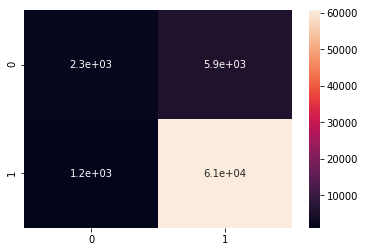

In [146]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_tr, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

#### sparsity check

In [147]:
print("Number of non zero elements obtained using L1 regularizer are:\n",np.count_nonzero(Lr1_optimal.coef_))
print("\nNumber of non zero elements obtained using L2 regularizer are:\n",np.count_nonzero(Lr2_optimal.coef_))

Number of non zero elements obtained using L1 regularizer are:
 50

Number of non zero elements obtained using L2 regularizer are:
 50


#### multicollinearity check

In [148]:
from scipy import stats
original_weights = Lr2_optimal.coef_.ravel()
noise_data=tfidf_sent_vectors+np.random.normal(0, 0.01)
Lr2_optimal.fit(noise_data,y_tr)
noise_weights = Lr2_optimal.coef_.ravel()
SpearmanrResult=stats.spearmanr(noise_weights,original_weights)
print("Spearman rank between the original weights and noise weights is:",SpearmanrResult[0])

Spearman rank between the original weights and noise weights is: 0.9999999999999999


# RandonSearchCV


The optimal number of C is 1.


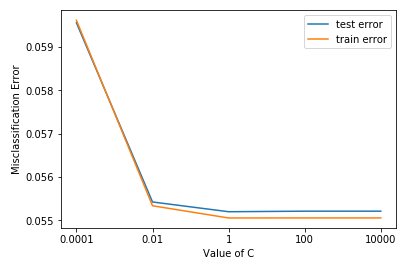

the misclassification error for each C value is :  [0.06  0.055 0.055 0.055 0.055]


In [149]:
from sklearn.model_selection import RandomizedSearchCV
C_val=[10**-4,10**-2, 10**0, 10**2 , 10**4]
tuned_parameters = {'C': C_val}
lr = LogisticRegression(penalty='l2')
model = RandomizedSearchCV(lr,tuned_parameters, scoring = 'f1',n_iter=5, cv=3,return_train_score=True)
model.fit(tfidf_sent_vectors, y_tr)
result=pd.DataFrame(model.cv_results_) 
MSE_test=[1-i for i in result['mean_test_score']]
MSE_train=[1-i for i in result['mean_train_score']]
optimal_c = C_val[MSE_test.index(min(MSE_test))]
print('\nThe optimal number of C is %d.' % optimal_c)
vals = [str(x) for x in C_val]
plt.plot(vals, MSE_test,label="test error")
plt.plot(vals, MSE_train,label="train error")
for xy in zip(vals, np.round(MSE_test,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
for xy in zip(vals, np.round(MSE_train,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.legend()
plt.xlabel('Value of C')
plt.ylabel('Misclassification Error')
plt.show()
print("the misclassification error for each C value is : ", np.round(MSE_test,3))

#### confusion matrix on test dataset

In [150]:
Lr2_optimal = LogisticRegression(C=optimal_c,penalty='l2')
Lr2_optimal.fit(tfidf_sent_vectors, y_tr)
pred = Lr2_optimal.predict(tfidf_test_vectors)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal Logistic Regression classifier for C = %d is %f%%' % (optimal_c, acc))


The accuracy of optimal Logistic Regression classifier for C = 1 is 88.496283%


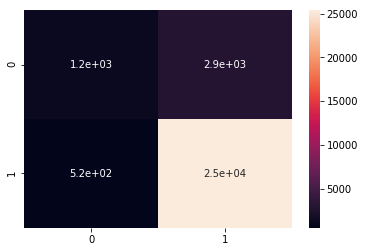

In [151]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

#### precision recall and f1-score values

In [152]:
from sklearn.metrics import precision_recall_fscore_support
scr=precision_recall_fscore_support(y_test, pred, average='weighted')
print("precision of the Logistic Regression for bag of words is",scr[0])
print("recall of the Logistic Regression for bag of words is",scr[1])
print("fscore of the Logistic Regression for bag of words is",scr[2])

precision of the Logistic Regression for bag of words is 0.8686059940453706
recall of the Logistic Regression for bag of words is 0.8849628320944032
fscore of the Logistic Regression for bag of words is 0.8635124676299788


#### confusion matrix on train dataset

In [154]:
Lr2_optimal = LogisticRegression(C=optimal_c,penalty='l2')
Lr2_optimal.fit(tfidf_sent_vectors, y_tr)
pred = Lr2_optimal.predict(tfidf_sent_vectors)
acc = accuracy_score(y_tr, pred) * 100
print('\nThe accuracy of optimal Logistic Regression classifier for C = %d is %f%%' % (optimal_c, acc))


The accuracy of optimal Logistic Regression classifier for C = 1 is 89.898571%


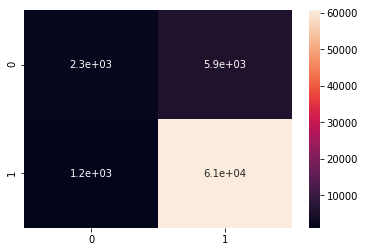

In [155]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_tr, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

# Summary table

<table style="width:100%">
  <tr>
    <th>Model</th>
    <th>Hyper parameter</th> 
    <th>Train accuracy</th>
    <th>Test accuracy</th>
  </tr>
  <tr>
    <td>Bag of words with L2 norm</td>
    <td>C=1</td> 
    <td>96.22</td>
    <td>91.96</td>
  </tr>
  <tr>
    <td>Bag of words with L1 norm</td>
    <td>C=1</td> 
    <td>95.44</td>
    <td>91.96</td>
  </tr>
  <tr>
    <td>Bag of words with Randomsearchcv</td>
    <td>C=1</td> 
    <td>96.22</td>
    <td>91.96</td>
  </tr>
  <tr>
    <td>tfidf with L2 norm</td>
    <td>C=1</td> 
    <td>93.75</td>
    <td>91.87</td>
  </tr>
  <tr>
    <td>tfidf with L1 norm</td>
    <td>C=1</td> 
    <td>95.43</td>
    <td>92.19</td>
  </tr>
   <tr>
    <td>tfidf with Randomsearchcv</td>
    <td>C=1</td> 
    <td>93.75</td>
    <td>91.87</td>
  </tr>
  <tr>
    <td>Avg W2V with L2 norm</td>
    <td>C=100</td> 
    <td>90.74</td>
    <td>89.49</td>
  </tr>
  <tr>
    <td>Avg W2V with L1 norm</td>
    <td>C=100</td> 
    <td>97.88</td>
    <td>89.49</td>
  </tr>
  <tr>
    <td>Avg W2V with Randomsearchcv</td>
    <td>C=100</td> 
    <td>90.74</td>
    <td>89.49</td>
  </tr>
  <tr>
    <td>Tfidf W2V with L2 norm</td>
    <td>C=1</td> 
    <td>89.55</td>
    <td>87.87</td>
  </tr>
  <tr>
    <td>Tfidf W2V with L1 norm</td>
    <td>C=1</td> 
    <td>89.89</td>
    <td>88.47</td>
  </tr>
  <tr>
    <td>Tfidf W2V with Randomsearchcv</td>
    <td>C=1</td> 
    <td>89.55</td>
    <td>87.87</td>
  </tr>
</table>
